# Lead Scoring Case Study (Logistic Regression)
---

## <strong><span style="color:brown">Step 1: Importing Libraries and Data</span></strong>
---

### 1.1 Supressing warnings
---

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1.2 Importing important libraries and display setting
---

In [2]:
# basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# statmodel libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# sklearn libraries --- here we will add libraries as per requirement and when needed

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import recall_score , precision_score , precision_recall_curve , f1_score
from sklearn.feature_selection import RFE

In [5]:
# setting the display option

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",None)

### 1.3 Reading the Data
---

In [6]:
# reading the dataset
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
leads_df.shape

(9240, 37)

<strong><span style="color:blue">NOTE: The original dataframe has 9240 rows and 37 columns</span></strong>

## <strong><span style="color:brown">Step 2: Data Inspection and Understanding </span></strong>
---

In [8]:
# checking the types of columns and number of cells
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<strong><span style="color:blue">NOTE: There are **`null values`** in the dataframe </span></strong>

In [9]:
# checking the number of missing values in each column
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<strong><span style="color:blue">NOTE: Some of the fields have quiet a high number of missing values. Actually have to deal with it in data cleaning section.</span></strong>

In [10]:
# Checking the overview of the numerical variable using describe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
# Looking for the number of unique values in the individual columns
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## <strong><span style="color:brown">Step 3: Data Cleaning process</span></strong>
---

### 3.1 Treatment for 'Select' values
---

<span style="color:blue">As per Problem Statement, many of the categorical variables have a one of the value called **`'Select'`** **which needs to be handled because it is as good as a null value.** reason might be is that the customer did not select any option from the list and therefore for such columns the data remained as default value which in turn is 'Select'.</span>

In [12]:
# checking for the columns having Select as value in it
cols_with_select_value = [col for col in leads_df.columns if len(leads_df[col].isin(['Select']).unique()) > 1]
cols_with_select_value

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [13]:
# replacing select value with NAN value
leads_df = leads_df.replace('Select',np.nan)

In [14]:
# once again checking the columns with Select as value.
cols_with_select_value = [col for col in leads_df.columns if len(leads_df[col].isin(['Select']).unique()) > 1]
cols_with_select_value

[]

### 3.2 Handling Missing Values
---

#### 3.2.1 Drop Columns with more than 40% Null Values
---

In [15]:
#finding the precentage of missing values in each and every columns
round(100*(leads_df.isnull().sum()/leads_df.shape[0]),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [16]:
col_with_missing_percent = round(100*(leads_df.isnull().sum()/leads_df.shape[0]),2).sort_values(ascending=False)
col_with_missing_percent_above_40 = col_with_missing_percent[col_with_missing_percent >=40].index.to_list()
print(len(col_with_missing_percent_above_40))

7


In [17]:
#shape before dropping of dataframe
leads_df.shape

(9240, 37)

In [18]:
leads_df.drop(labels=col_with_missing_percent_above_40,axis=1,inplace=True)

In [19]:
#shape before dropping of dataframe
leads_df.shape

(9240, 30)

In [20]:
# Checking the percentage of null values for remaining columns
round(100*(leads_df.isnull().sum()/leads_df.shape[0]),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

### 3.2.2 Columns with Categorical Data
---

In [21]:
# selecting categorical columns
categorical_cols = leads_df.select_dtypes(include=['category', 'object']).columns.to_list()
print(categorical_cols)
print(len(categorical_cols))

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
25


In [22]:
columnsList= ["Specialization","Tags","City",'Country','What matters most to you in choosing a course',
              'What is your current occupation','Last Activity','Lead Source']

for i in columnsList:
        perc=100*leads_df[i].value_counts(normalize=True)
        print("value_counts in percent for :",i,"\n")
        print(perc,"\n")
        print("___"*20,"\n")

value_counts in percent for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64 

____________________________________________________________ 

value

#### Insights:
- <strong><span style="color:blue">Specialization:</span></strong> The specialization selected is evenly distributed and has 36.58 % missing values. Hence imputation or dropping is not a good choice. We need to create additional category called `'Others'`. 

- <strong><span style="color:maroon">Tags:</span></strong> Tags are assigned to customers indicating the current status of the lead and has 36.29 % missing values. Since this is current status, this column will `not be useful for modeling`. Hence it can be `dropped`.

- <strong><span style="color:maroon">City:</span></strong> Missing values in City column is around 39.71 %. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence `City column can be dropped`. 

- <strong><span style="color:maroon">Country:</span></strong> Since 95.76% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

- <strong><span style="color:maroon">What matters most to you in choosing a course:</span></strong> This Column has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is very highly skewed and will `not provide any insight`.

- <strong><span style="color:blue">What is your current occupation:</span></strong> `'Unemployed'` is the mode value for this column. Therefore acts as an important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed. 

- <strong><span style="color:blue">Last Activity:</span></strong> `"Email Opened"` forms the mode value and overall missing values in this column is just 1.11%, hence we will impute the missing values with label `'Email Opened'`.

- <strong><span style="color:blue">Lead Source:</span></strong> `"Google"` forms the mode value and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

<hr>


<strong><span style="color:purple">Dropping these columns which are as:-</span></strong> 
- 'Tags',
- 'City',
- 'Country',
- 'What matters most to you in choosing a course'

In [23]:
# shape before dropping
leads_df.shape

(9240, 30)

In [24]:
# dropping columns
leads_df.drop(['Tags','City','Country','What matters most to you in choosing a course'],axis=1,inplace=True)

In [25]:
# shape after dropping
leads_df.shape

(9240, 26)

<strong><span style="color:purple">Imputing these columns which are as:-</span></strong> 
- 'Specialization',
- 'What is your current occupation',
- 'Last Activity',
- 'Lead Source'

In [26]:
# Imputing values as per the above observations/insights

missing_vals={'Specialization':'Others','What is your current occupation':'Unemployed',
              'Last Activity':'Email Opened','Lead Source':'Google'}
leads_df = leads_df.fillna(value= missing_vals)

In [27]:
# once again checking the percentage of null values in columns
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

### 3.2.3 Columns with Numerical Data
---

In [28]:
# lets look into TotalVisits
leads_df.TotalVisits.value_counts().head(10)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

<strong><span style="color:blue">NOTE: Missing values in column 'TotalVisits' can be imputed with `mode` value.</span></strong>

In [29]:
leads_df.TotalVisits.mode()[0]

0.0

In [30]:
leads_df['TotalVisits'].fillna(leads_df.TotalVisits.mode()[0],inplace=True)

In [31]:
# lets look into Page Views Per Visit 
leads_df['Page Views Per Visit'].value_counts().head(10)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

<strong><span style="color:blue">NOTE: Missing values in column 'Page Views Per Visit' can be imputed with `mode`.</span></strong> 

In [32]:
leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].mode()[0],inplace=True)

In [33]:
# once again checking the percentage of null values in columns
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### 3.3 Unwanted Columns Removal
---

#### 3.3.1 Handling columns with only one unique value 
---

In [34]:
leads_df.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

<strong><span style="color:blue">NOTE:</span></strong>Below mentioned columns have only **`one unique value`**:-
- 'Magazine',
- 'Receive More Updates About Our Courses',
- 'Update me on Supply Chain Content',
- 'Get updates on DM Content',
- 'I agree to pay the amount through cheque' 
 

These columns are of no use as they have <u>_only one category of response_</u> from customer and can be <strong><span style="color:red">dropped.</span></strong>



In [35]:
# shape before dropping
leads_df.shape

(9240, 26)

In [36]:
# we are going to drop columns having only 1-unique value.
cols_with_1_unique_val = leads_df.nunique()[leads_df.nunique() == 1].index.to_list()
leads_df.drop(cols_with_1_unique_val,axis=1,inplace=True)

In [37]:
# shape after dropping
leads_df.shape

(9240, 21)

#### 3.3.2 Dropping columns having no use in modeling
---

<strong><span style="color:blue">NOTE:</span></strong> Columns such as:
 
- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity' 
 
Above columns do not add any value to the model as most of them are used to uniquely identify customer/prospect Dropping these columns will remove unnecessary data from the dataframe.

In [38]:
# shape before dropping
leads_df.shape

(9240, 21)

In [39]:
leads_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

In [40]:
# shape after dropping
leads_df.shape

(9240, 18)

In [41]:
# once again checking the percentage of null values in columns
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2).sort_values(ascending=False)

Lead Origin                               0.0
Lead Source                               0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
A free copy of Mastering The Interview    0.0
dtype: float64

<strong><span style="color:blue">NOTE: No missing values in any columns</span></strong>

### 3.4 Investigating & Dropping Category Columns that are Skewed
---

#### 3.4.1 Now checking skewness in categorical columns
---

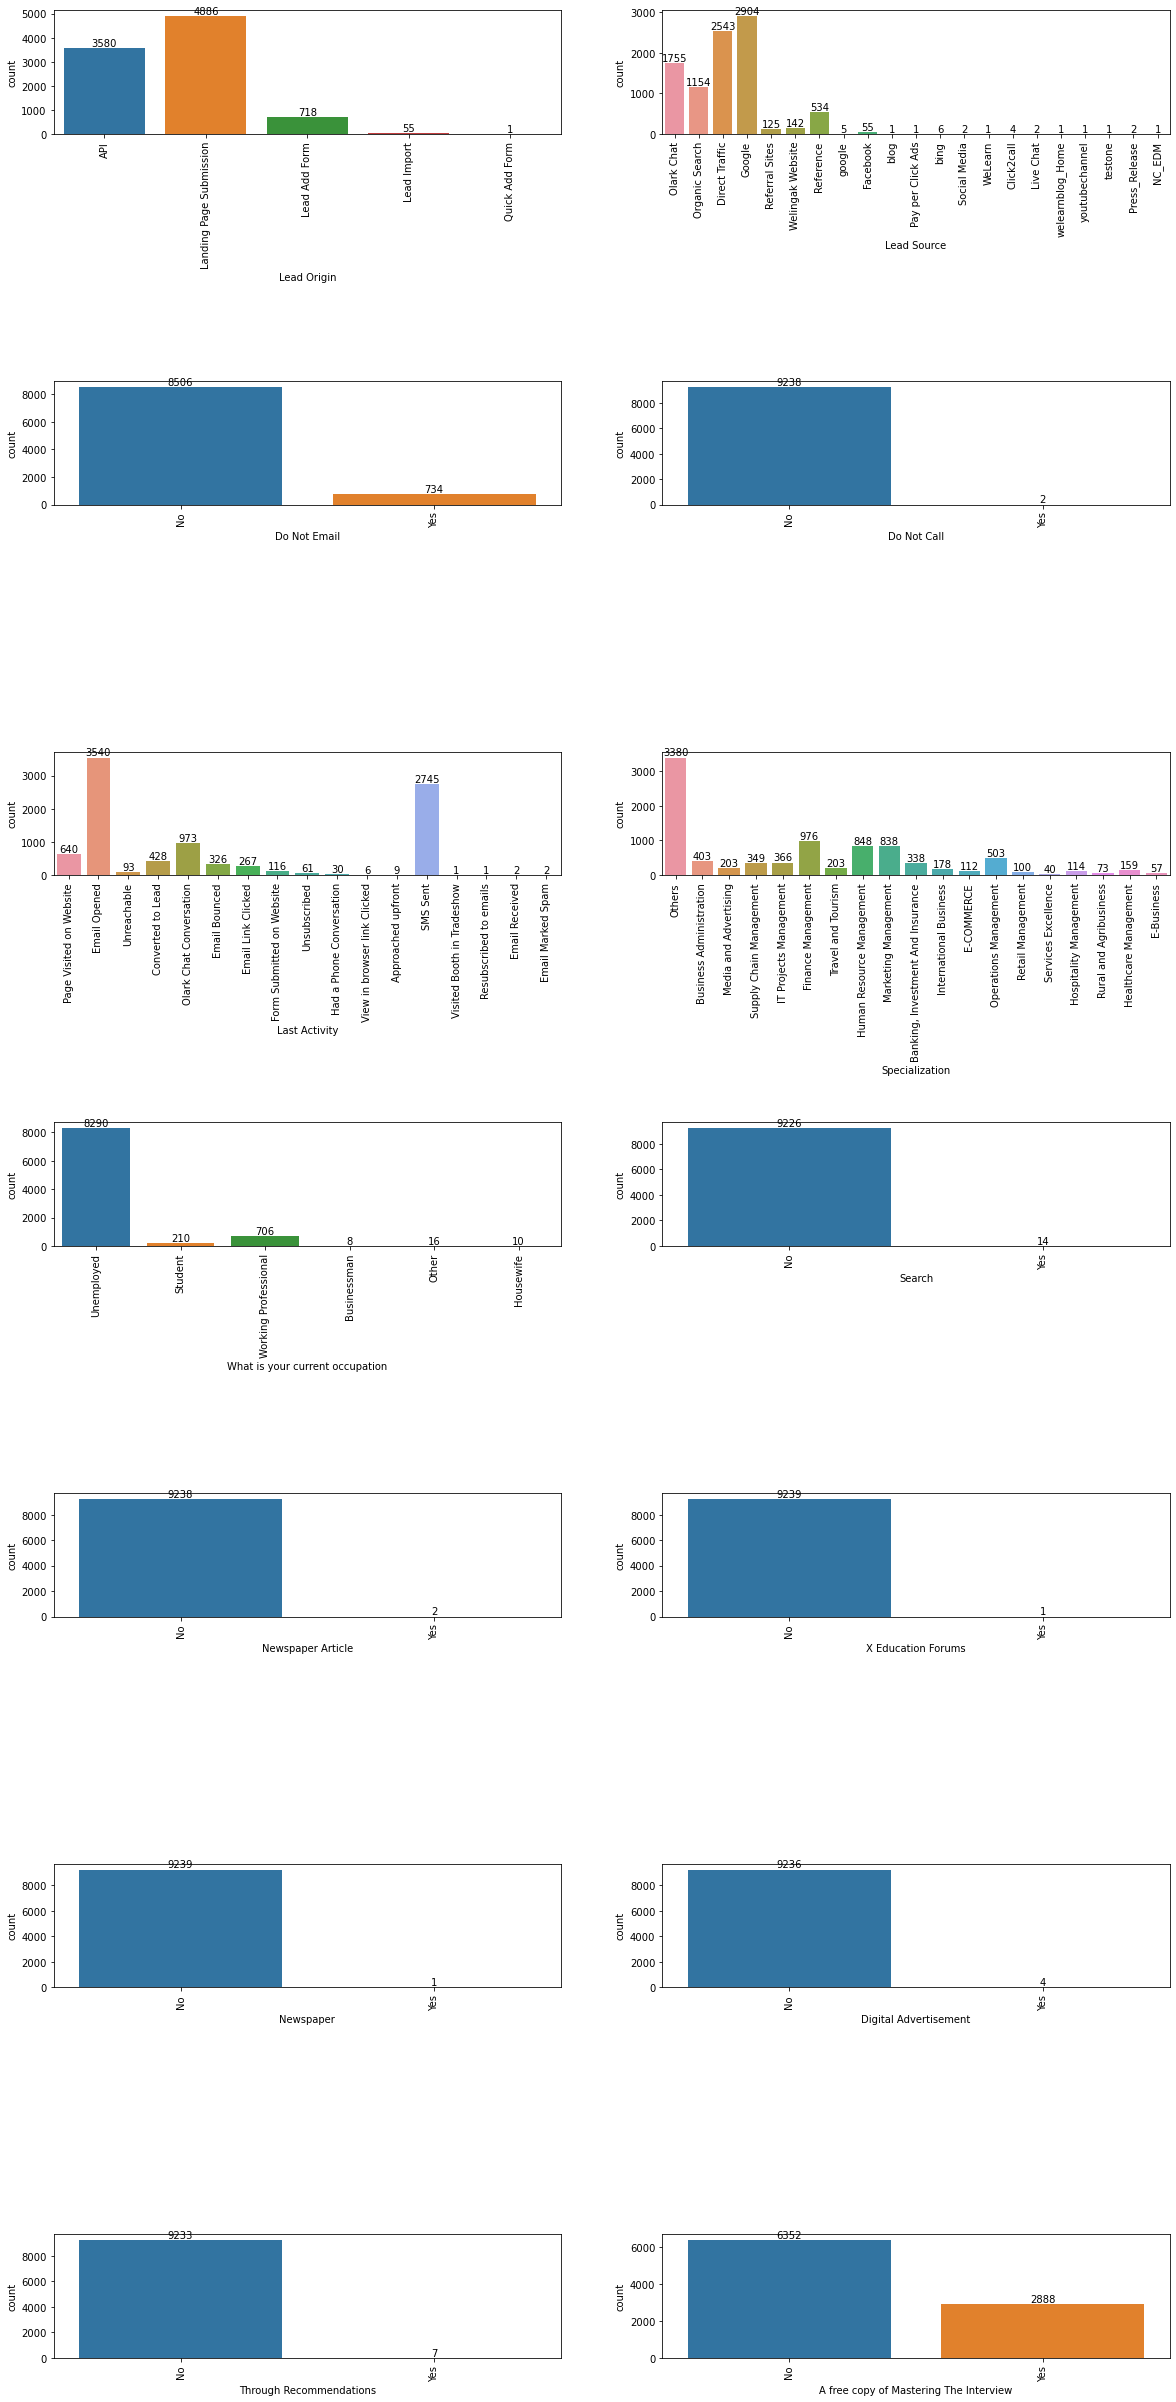

In [42]:
# plotting countplot for categorical variables
categorical_cols = leads_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(20,50))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_cols):
    plt.subplot(8,2, i[0]+1)
    axes=sns.countplot(x=i[1],data=leads_df) 
    plt.xticks(rotation=90)
    
    for p in axes.patches:
        axes.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

plt.show()

<strong><span style="color:blue">NOTE:</span></strong> These are the columns which are `highly skewed` :-
- 'Digital Advertisement',
- 'Through Recommendations'
- 'Search', 
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',  
- 'Do Not Call'

Morever, any Skewed variables can affect the result of logistic regression models, as they can `lead to biased results` or `inaccurate parameter estimation`.Therefore these column can be `dropped` as they will not add any value to the model. 

In [43]:
#shape before dropping
leads_df.shape

(9240, 18)

In [44]:
leads_df.drop(['Digital Advertisement','Through Recommendations','Search','Newspaper Article',
               'X Education Forums','Newspaper','Do Not Call'],axis=1,inplace=True)

In [45]:
#shape after dropping
leads_df.shape

(9240, 11)

In [46]:
# let's take a overview of dataframe
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [47]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

#### Dataset is clean now
 - After data is cleaned lets standardise values and treat outliers

### 3.5 Analysis of Outliers and their treatment
---

#### For Numerical Columns
---

In [48]:
def outliersChecker(data,columnList):
    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    
    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)
        sns.boxplot(y=data[j])
        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='red')

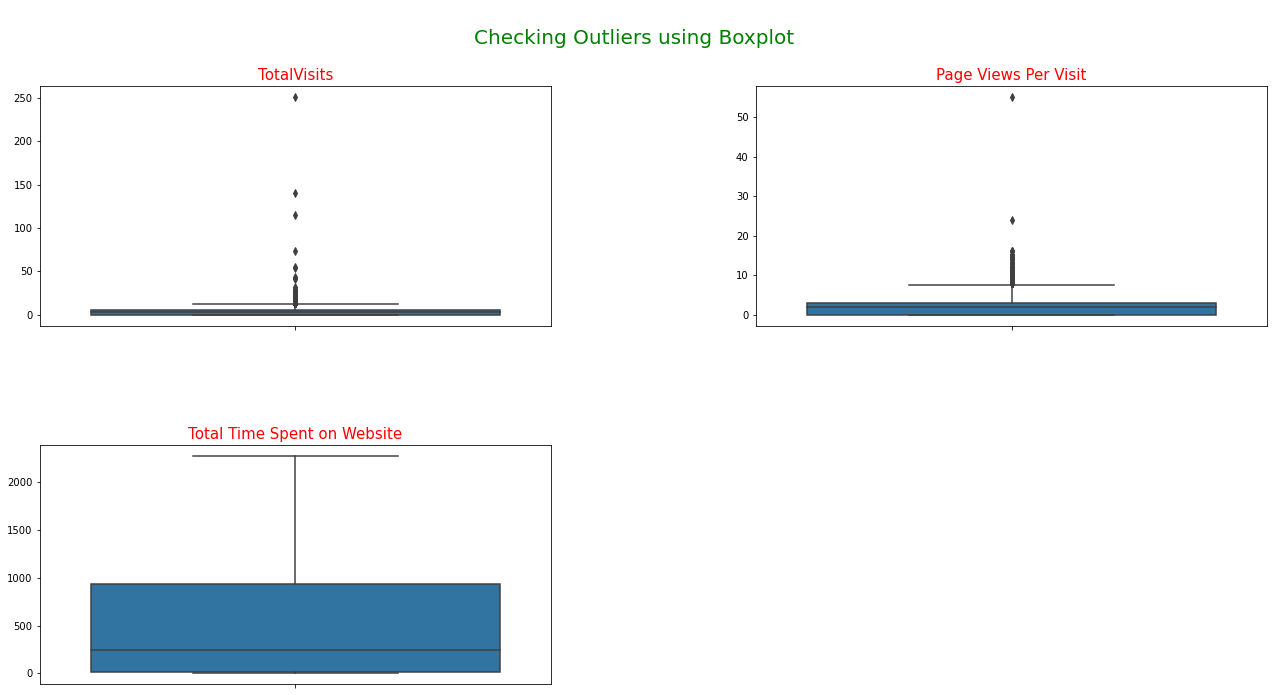

In [49]:
# outliers analysis for numerical variables other than target variable 
numerical_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
outliersChecker(leads_df,numerical_cols)

<strong><span style="color:blue">Can clearly see that column "TotalVisits" and "Page Views Per Visit" have outliers</span></strong>

In [50]:
#let's check the outliers in numerical variable prior to its treatment
leads_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [51]:
# defining the upper and lower limit for outliers treatment

def outlierTreatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        iqr = q3 - q1
        upper_limit = q3 + 1.5*iqr
        lower_limit = q1 - 1.5*iqr
        
        df[i] = np.where(df[i]>upper_limit,upper_limit,df[i])
        df[i] = np.where(df[i]<lower_limit,lower_limit,df[i])

In [52]:
cols_having_outliers = ['TotalVisits','Page Views Per Visit']
outlierTreatment(leads_df,cols_having_outliers)

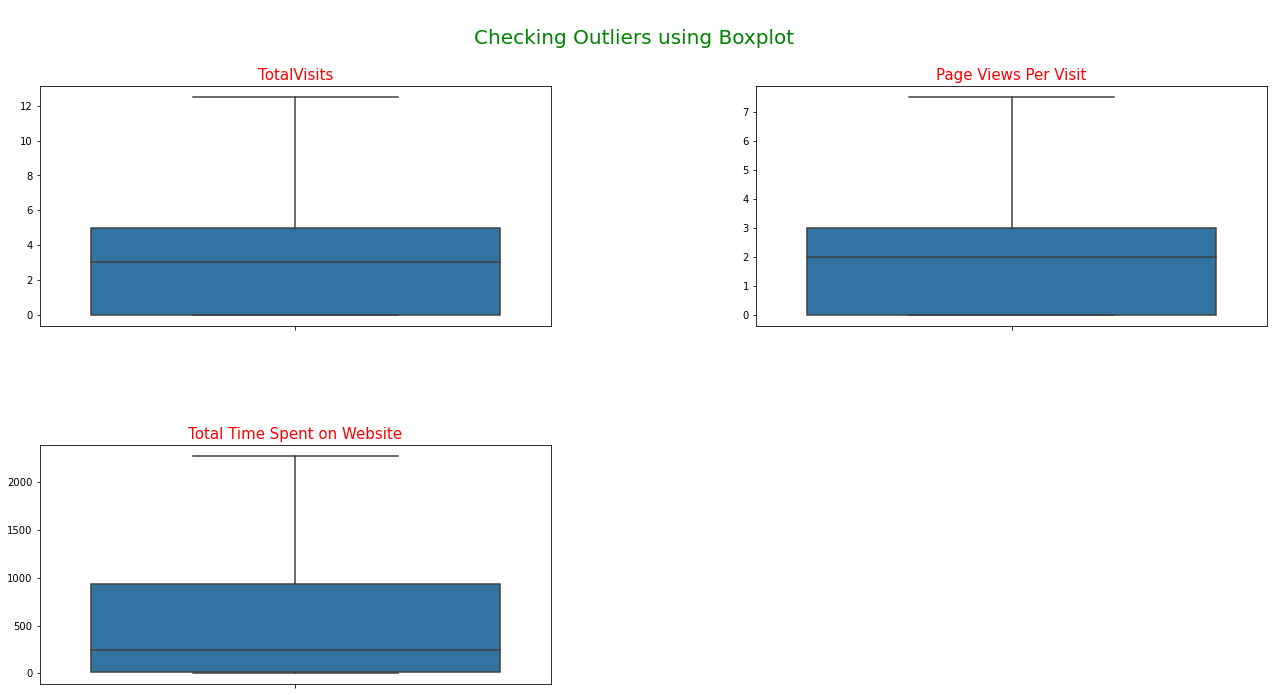

In [53]:
# once again checking the outliers in those columns
outliersChecker(leads_df,numerical_cols)

In [54]:
# once again checking the outliers in those columns using describe()
leads_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


### 3.6 Standardising values in columns & Fixing absurd/invalid values

- Checking if entries in data are in correct format or not , casing styles (UPPER,lower)
- Checking data types of columns
---

In [55]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [56]:
categorical_cols = leads_df.select_dtypes(include=['category', 'object']).columns.tolist()
print(len(categorical_cols))
print(categorical_cols)

7
['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview']


In [57]:
for i in categorical_cols:
        perc=100*leads_df[i].value_counts(normalize=True)
        print("value_counts for column :",i,"\n")
        print(perc,"\n")
        print("****"*20,"\n")

value_counts for column : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

******************************************************************************** 

value_counts for column : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010

<strong><span style="color:blue">NOTE:</span></strong> 

- columns `"Lead Score" and "Last Activity"` quite few of labels whose value count is very less therefore we're planning to group these categories together under "Others", which in turn prevent from ending up with a bunch of unnecessary columns

- Also we can see `"Google"` & `"google"` are same in `"Lead Source"`, so we will standardise the case.

#### 3.6.1 Grouping Low frequency values
---

In [58]:
#grouping Lead source column
leads_df['Lead Source'] = leads_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

In [59]:
# standardising the Lead source columns value
leads_df['Lead Source'] = leads_df['Lead Source'].replace("google","Google")

In [60]:
leads_df['Lead Source'].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [61]:
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [62]:
leads_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [63]:
#renaming few columns as they are having very large name for easier access
leads_df.rename(columns={"A free copy of Mastering The Interview" : "Free_copy"},inplace=True)
leads_df.rename(columns={"What is your current occupation" : "Current_occupation"},inplace=True)

<strong><span style="color:blue">NOTE:</span></strong> 
- "Free_copy" & "Do Not Email" both are binary categorical columns lets map both of them yes/no to 1/0

In [64]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   object 
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 794.2+ KB


In [65]:
#mapping binary categorical variable into 0's and 1's
leads_df['Do Not Email'] = leads_df['Do Not Email'].apply(lambda x: 1 if x == 'Yes' else 0)
leads_df['Free_copy'] = leads_df['Free_copy'].apply(lambda x: 1 if x == 'Yes' else 0)

In [66]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


<strong><span style="color:blue">NOTE: The data types appear to be suitable and no modifications are necessary.</span></strong> 

## <strong><span style="color:brown">Step 4: Exploratory Data Analysis(EDA)</span></strong>
---

### 4.1 Checking Data Imbalance
- checking data imbalance for target variable
- `Target variable` is `'Converted'` which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted 
---

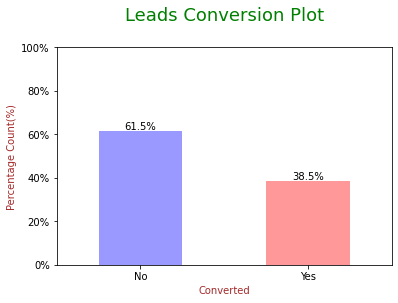

In [67]:
# bar plot checking imbalance

axes=(100*leads_df["Converted"].value_counts(normalize=True)).plot.bar(color=["Blue","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Conversion Plot\n", fontdict={'fontsize': 18, 'fontweight' : 14, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'color': 'Brown'})
plt.ylabel("Percentage Count(%)", fontdict={'color': 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in axes.patches:
    axes.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()


<strong><span style="color:purple">Insights:</span></strong> 
- **Conversion rate is of 38.5%**, this means only 38.5% of the people have been converted to leads.(i.e. Minority)
- While 61.5% of the people didn't get convert to leads. (i.e. Majority)

### 4.2 Univariate Analysis
---

#### 4.2.1 Univariate Analysis of Categorical Variables:-
---

In [68]:
#categorical columns List
cate_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

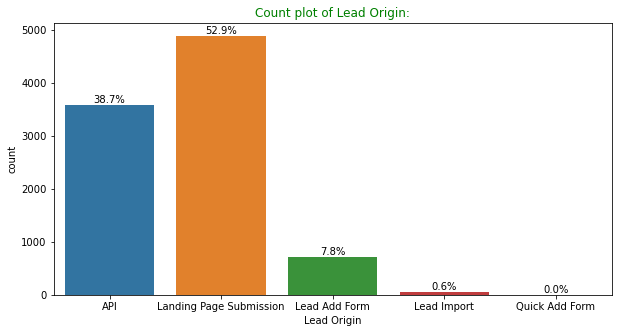

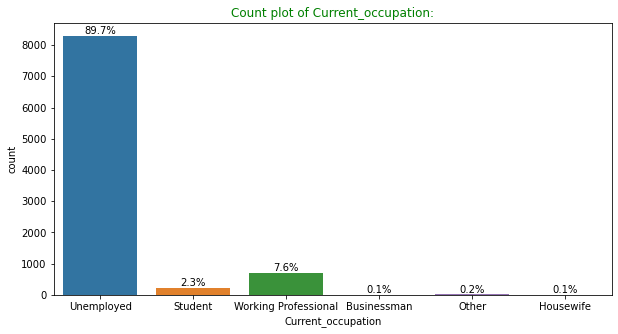

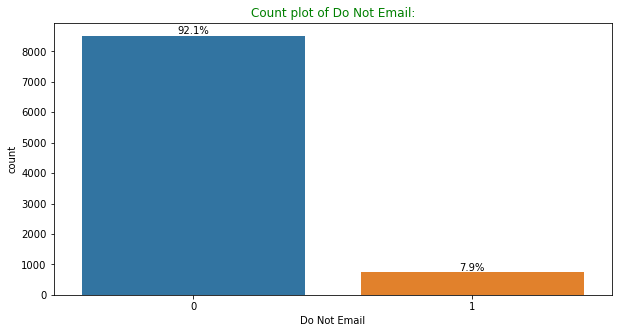

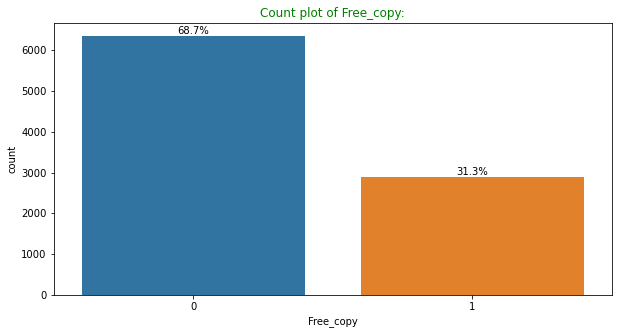

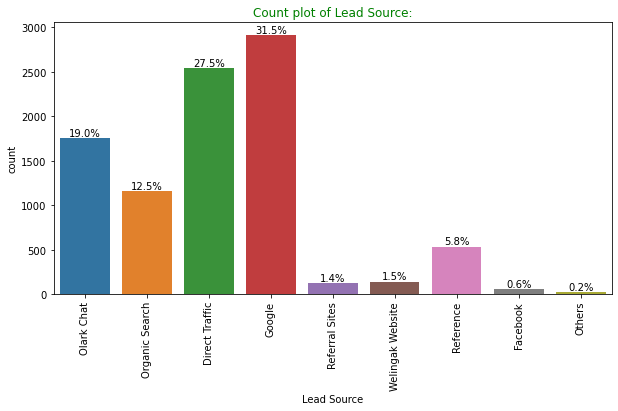

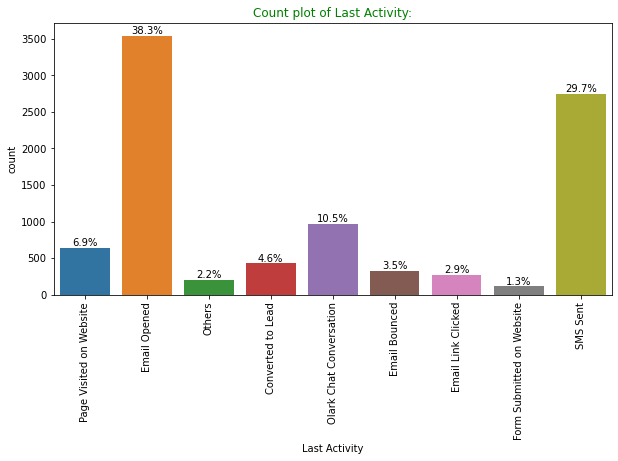

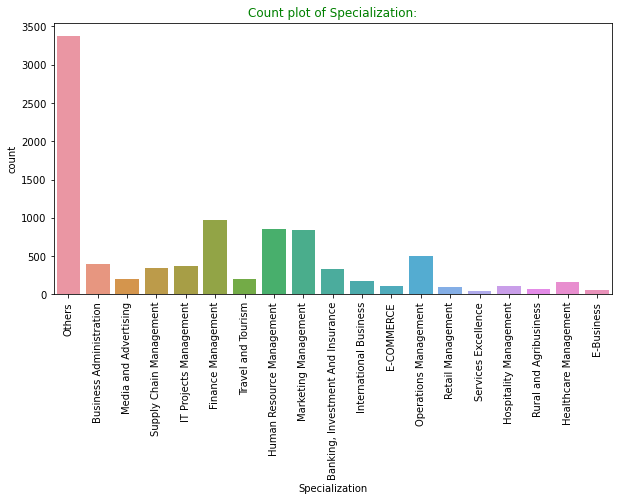

In [69]:
# Barplot for above List of columns 
count = 0
for i in cate_cols:
    count+=1
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}:".format(i),color="green")
    axes=sns.countplot(x=i,data=leads_df)
    totals=len(leads_df[i])
    if count>4:
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)
    if i!="Specialization":
        for p in axes.patches:
            text = '{:.1f}%'.format(100*p.get_height()/totals)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()
        
            axes.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass
    

<strong><span style="color:purple">General Observations:</span></strong> 

- In above Univariate Analysis we get to know the values are distributed in each variables.

- With this we get some understanding that which variables can be used in **Bivariate analysis**.
---

<strong><span style="color:purple">Insights From Univariate Analysis:</span></strong>  

**Here is the list of features from variables which are present in majority (Converted and Not Converted included)** 

- **Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course.
 
- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined

- **Current_occupation:** It has 90% of the customers as Unemployed

- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%.

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities

<strong><span style="color:blue">NOTE: These insights will be helpful in further during bivariate analysis.</span></strong> 

---

### 4.3 Bivariate Analysis

---

#### 4.3.1 Bivariate Analysis for Categorical Variables
---

In [70]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def categoricalBivariate(df,variable_name,Target="Converted"):
    plt.figure(figsize=(30,8))
    plt.suptitle("{} Countplot v/s Lead Conversion Rates".format(variable_name),color="Brown", fontsize=20)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of column {}".format(variable_name),color="blue")
    axes=sns.countplot(x=variable_name,hue=Target,data=leads_df,palette="prism_r",alpha=0.46)
    
    total=len(leads_df[variable_name])
    plt.xticks(rotation=45)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in axes.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        axes.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of Column {}".format(variable_name),color="green",fontsize=12)
    axes1=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation

    # Modifications
    plt.xticks(rotation=45)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # actual calculation for the conversion rate is done below
    all_heights = [[p.get_height() for p in bars] for bars in axes1.containers]
    for bars in axes1.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            axes1.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


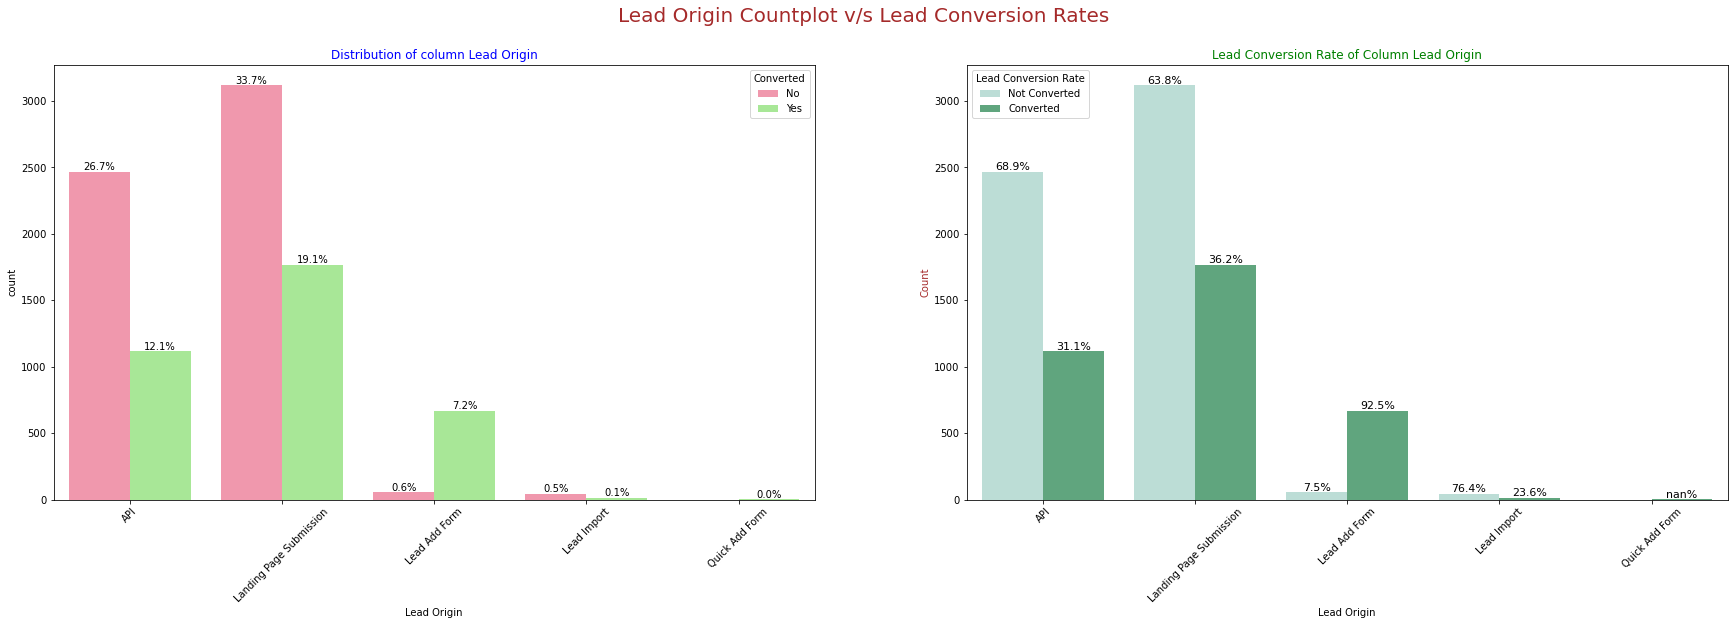

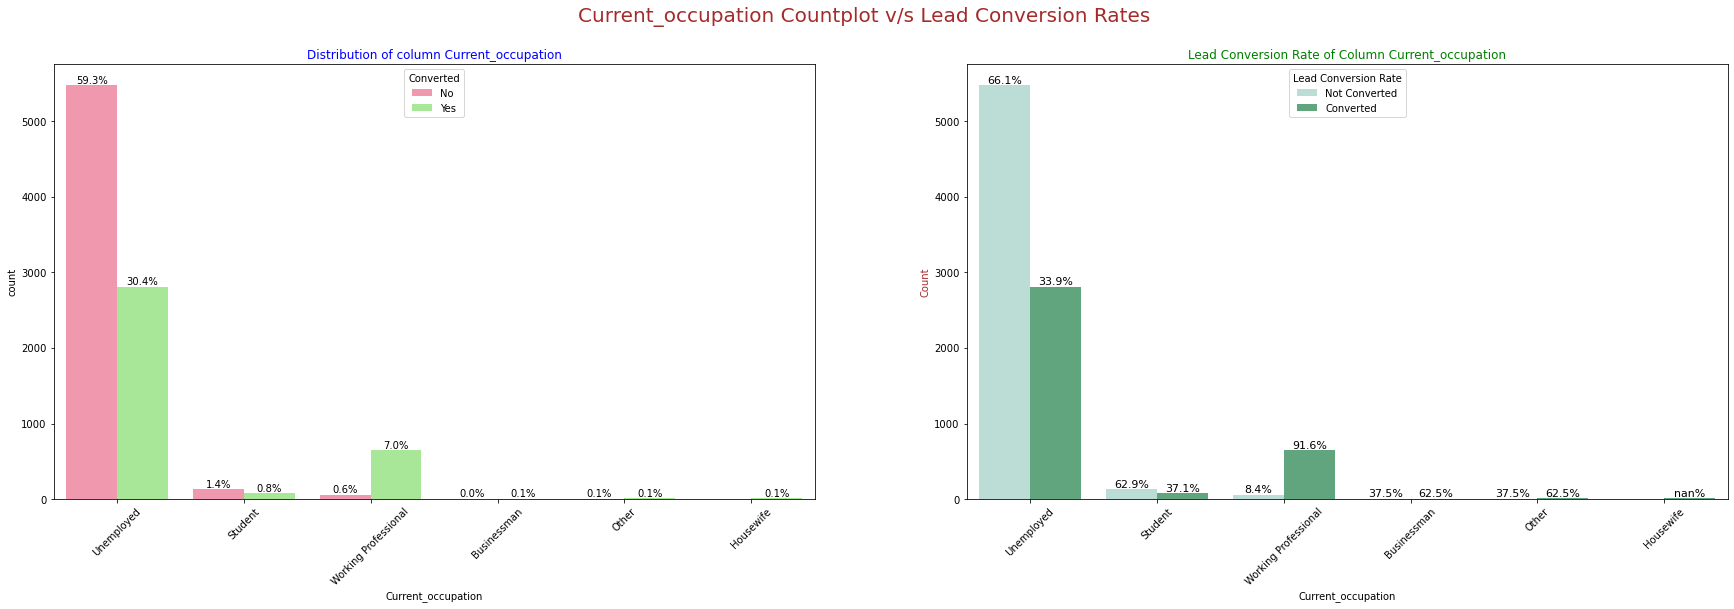

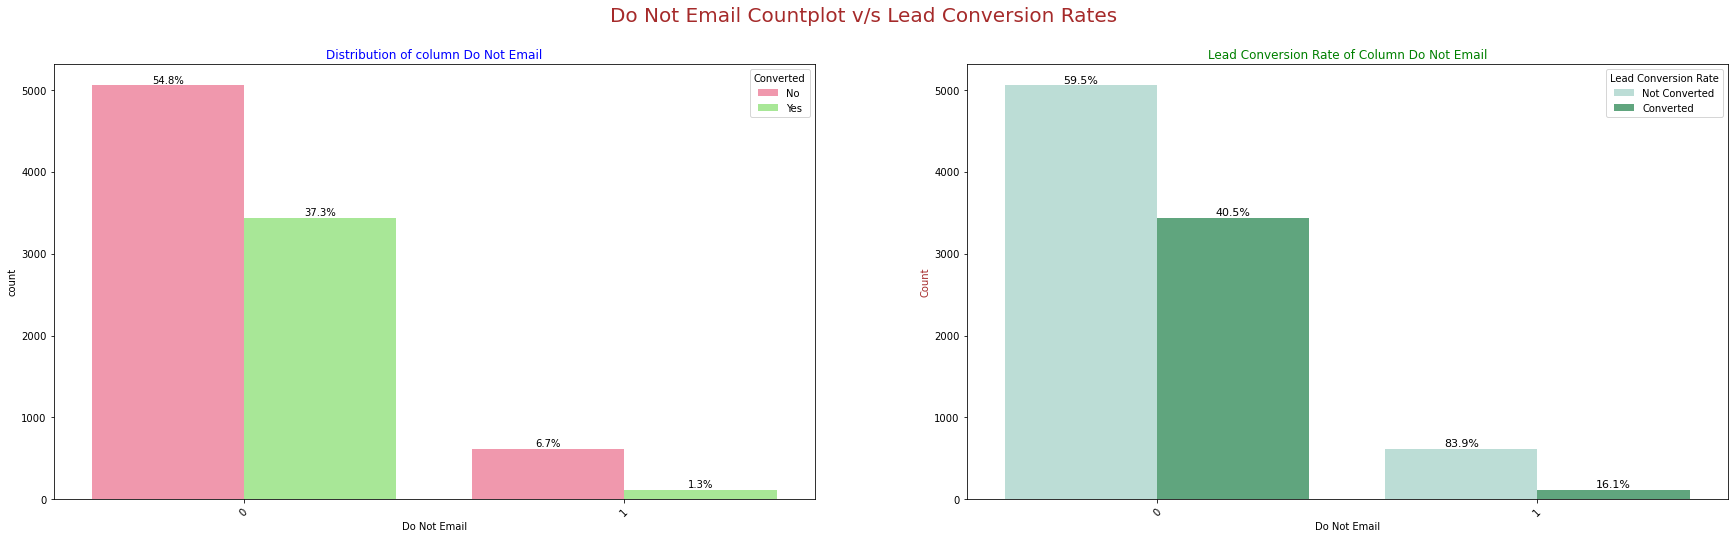

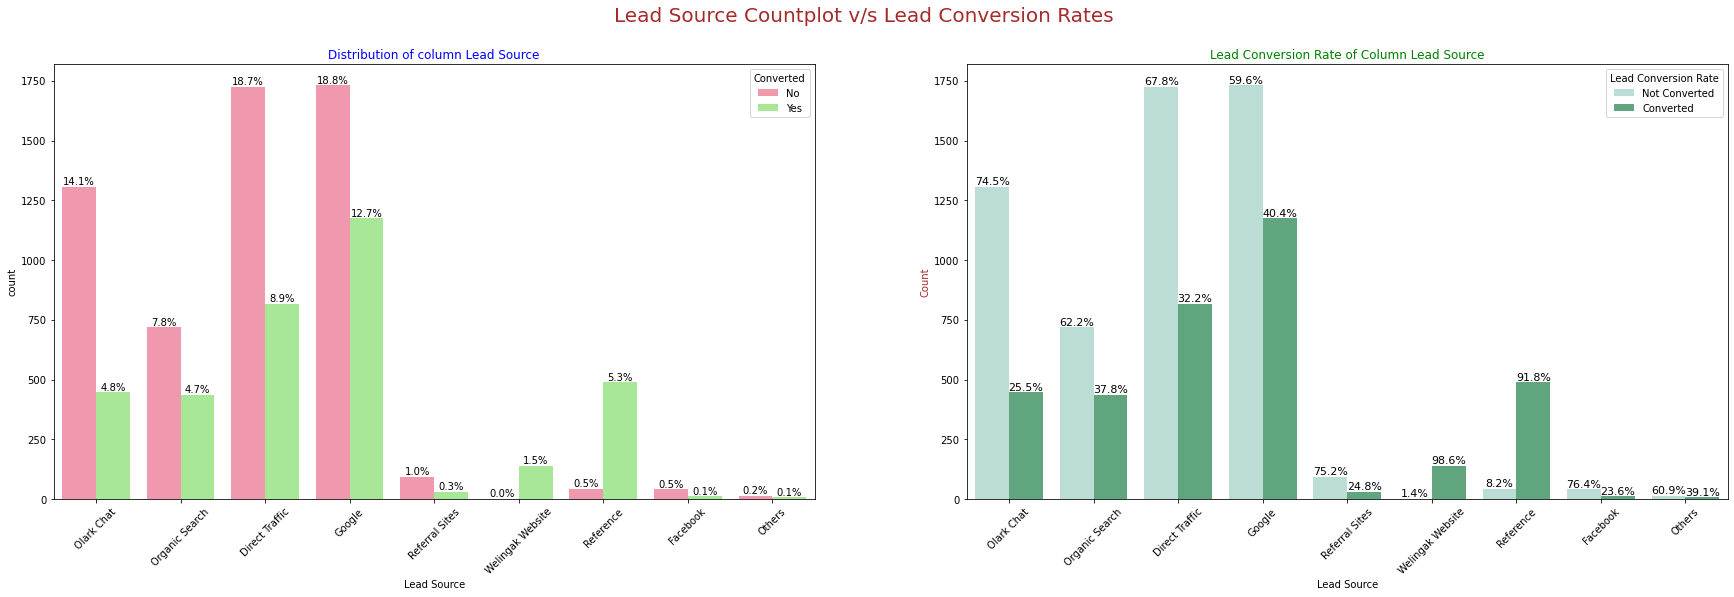

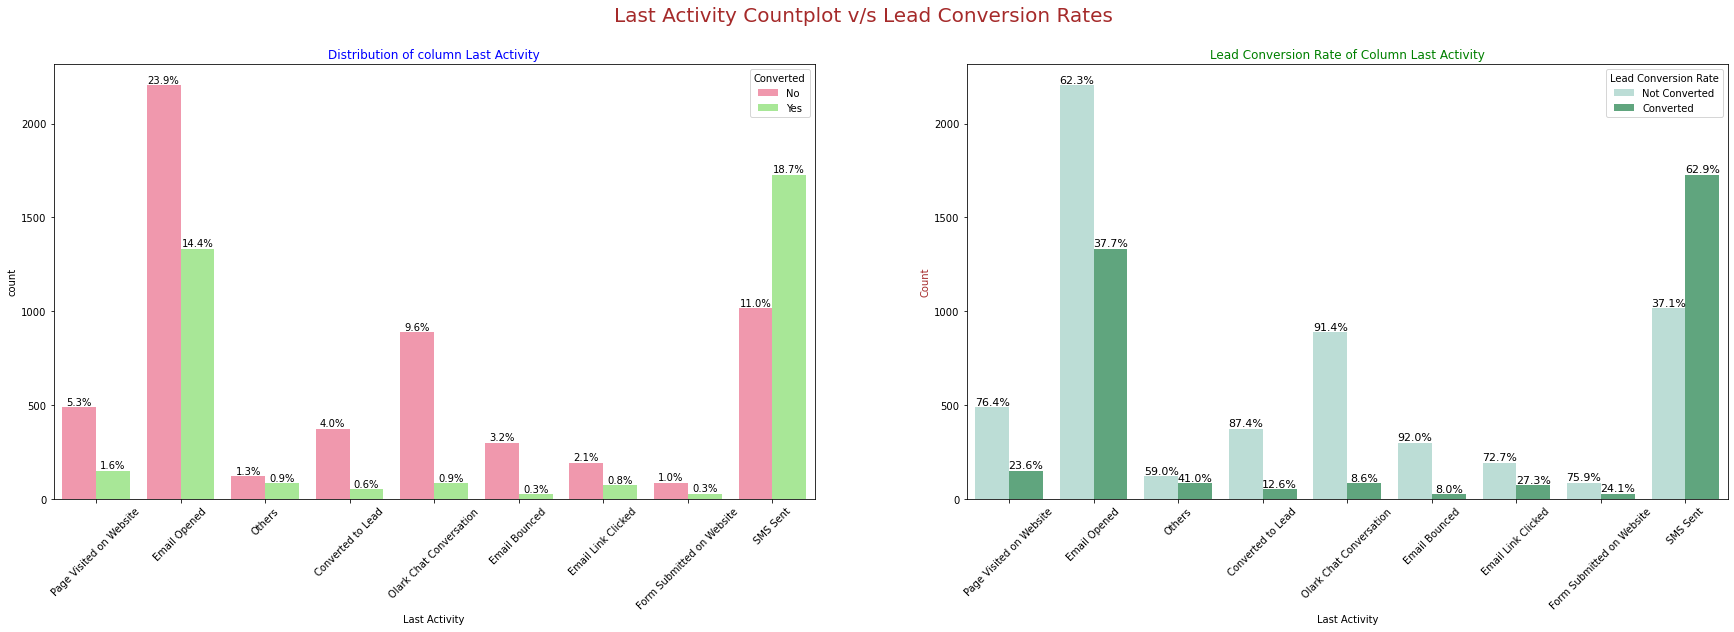

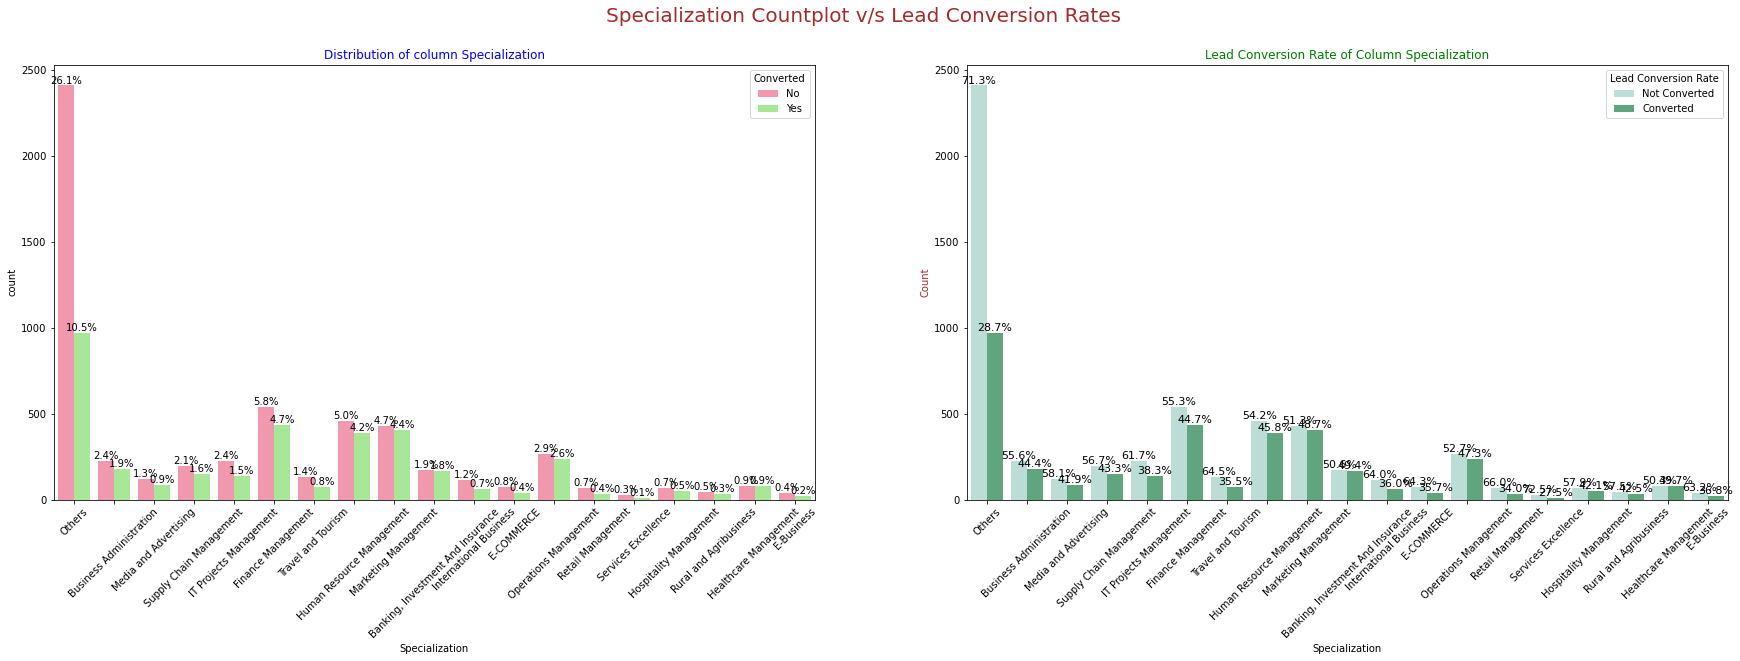

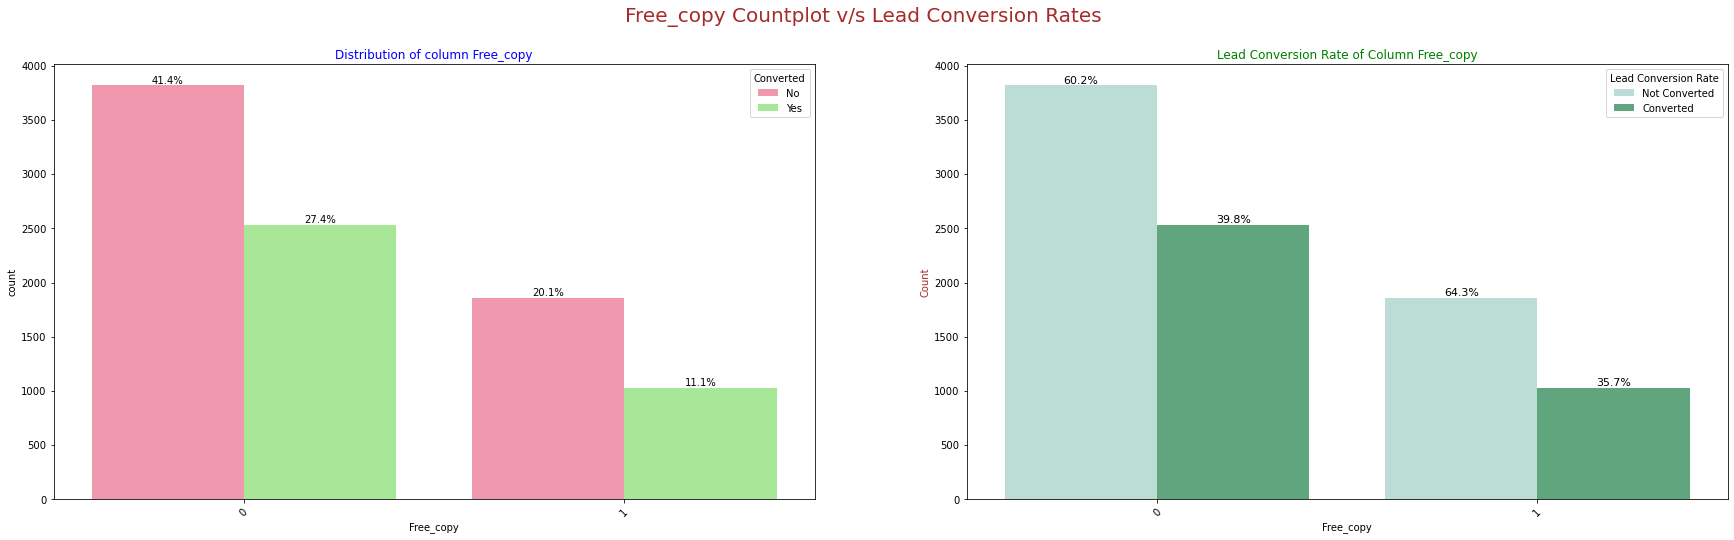

In [71]:
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    categoricalBivariate(leads_df,variable_name=i)

<strong><span style="color:Blue">Note:</span></strong> That we have assumed **LCR** is **Lead Conversion Rate** in short form.

<strong><span style="color:purple">Insights from above bivariate analysis:</span></strong> 

- <strong><span style="color:Green">Lead Source:</span></strong> _Google_ has **LCR of 40%** out of 31% customers , _Direct Traffic_ contributes **32% LCR** with 27% customers which is lower than Google,_Organic Search_ also gives **37.8% of LCR** but the contribution is by only 12.5% of customers ,_Reference_ has **LCR of 91%** but there are only around 6% of customers through this Lead Source.

- <strong><span style="color:Green">Lead Origin:</span></strong> Around 52% of all leads originated from _"Landing Page Submission"_ with a **lead conversion rate (LCR) of 36%**.The _"API"_ identified approximately 39% of customers with a **lead conversion rate (LCR) of 31%**.

- <strong><span style="color:Green">Do Not Email:</span></strong> There are 92% of people who don't want to get emailed.

- <strong><span style="color:Green">Current_occupation:</span></strong> Around 90% of the customers are _Unemployed_ with **lead conversion rate (LCR) of 34%**. While _Working Professional_ contribute only 7.6% of total customers with almost **92% lead conversion rate (LCR)**.

- <strong><span style="color:Green">Last Activity:</span></strong> _'SMS Sent'_ has **high lead conversion rate of 63%** with 30% contribution from last activities, _'Email Opened'_ activity contributed 38% of last activities performed by the customers with 37% lead conversion rate.

- <strong><span style="color:Green">Specialization:</span></strong> Marketing Managemt,HR Management,Finance Management shows good contribution.

#### 4.3.2 Bivariate Analysis for Numerical Variables:-
---

<Figure size 1440x360 with 0 Axes>

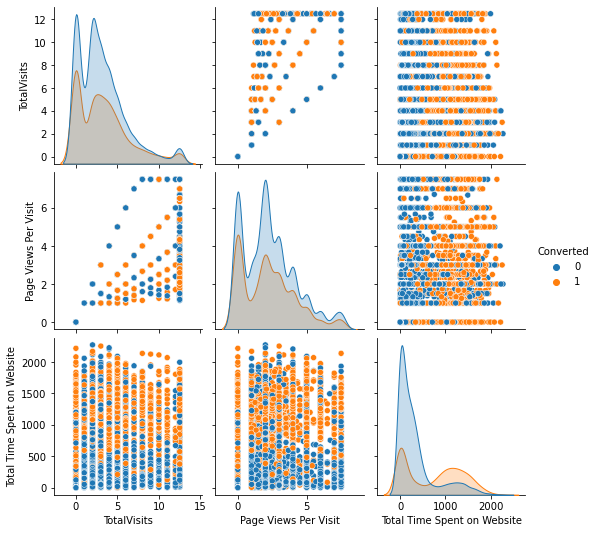

In [72]:
plt.figure(figsize=(20,5))
sns.pairplot(data=leads_df, vars=numerical_cols,hue='Converted')
plt.show()

In [73]:
num_cols = ["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

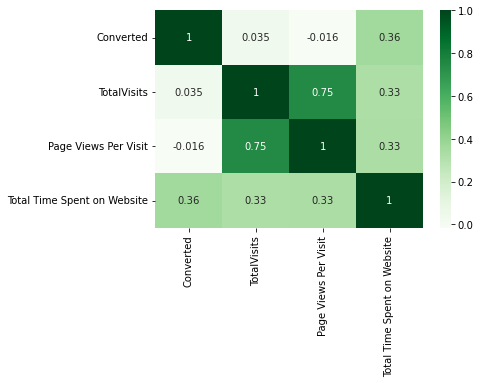

In [74]:
# heatmap to show the correlation between numerical variables
sns.heatmap(data=leads_df[num_cols].corr(),cmap="Greens",annot=True)
plt.show()

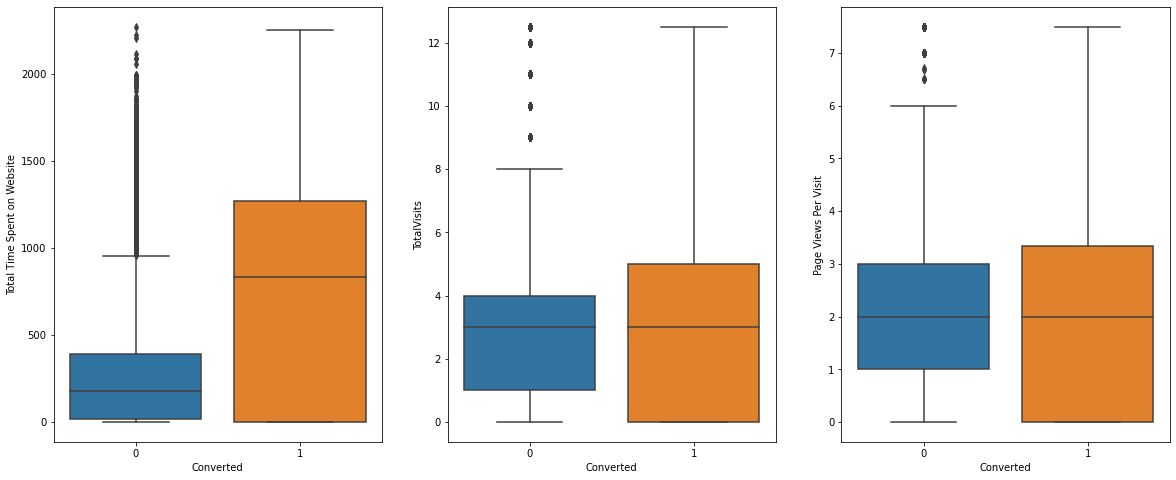

In [75]:
# creating boxplot for numerical variables with hue as Converted

plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)

plt.show()

<strong><span style="color:Blue">Insights from above boxplot: Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot</span></strong> 

## <strong><span style="color:brown">Step 5: Data Preparation Process</span></strong>
---

### 5.1 Dummy Variables
---

In [76]:
# let's take a look at dataframe
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [77]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


In [78]:
# shape before creating dummy variable
leads_df.shape

(9240, 11)

In [79]:
dummy_col = pd.get_dummies(leads_df[["Lead Origin","Lead Source","Last Activity",
                                     "Specialization","Current_occupation"]],drop_first=True)
leads_df = pd.concat([leads_df,dummy_col],axis=1)

In [80]:
leads_df = leads_df.drop(["Lead Origin","Lead Source","Last Activity",
                                     "Specialization","Current_occupation"],1)

In [81]:
#shape after creating dummy variable
leads_df.shape

(9240, 49)

In [82]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

## <strong><span style="color:brown">Step 6: Spliting the Dataset into train-test</span></strong>
---

In [83]:
# creating y and x variable for model
y = leads_df['Converted']
X = leads_df.drop('Converted', axis=1)

In [84]:
y.shape

(9240,)

In [85]:
X.shape

(9240, 48)

In [86]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [87]:
print('X_train = ',end='')
print(X_train.shape)
print('y_train = ',end='')
print(y_train.shape)

X_train = (6468, 48)
y_train = (6468,)


In [88]:
print('X_test = ',end='')
print(X_test.shape)
print('y_test = ',end='')
print(y_test.shape)

X_test = (2772, 48)
y_test = (2772,)


## <strong><span style="color:brown">Step 7: Scaling of Features </span></strong>
---

In [89]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,0,4.0,487,1.33,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,0,5.0,106,2.50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,0,5.0,1230,5.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [90]:
# Applying Standard Scaling on numerical columns
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [91]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [92]:
# calculating LCR(i.e. Lead conversion rate) prior to the actual model building
LCR = (sum(leads_df.Converted)/len(leads_df.Converted.index))*100
LCR

38.53896103896104

<strong><span style="color:Blue">Note: Conversion Rate is 38.5% .</span></strong>

### 7.1 : Correlation Checking
- Feature elimination based on correlations
---

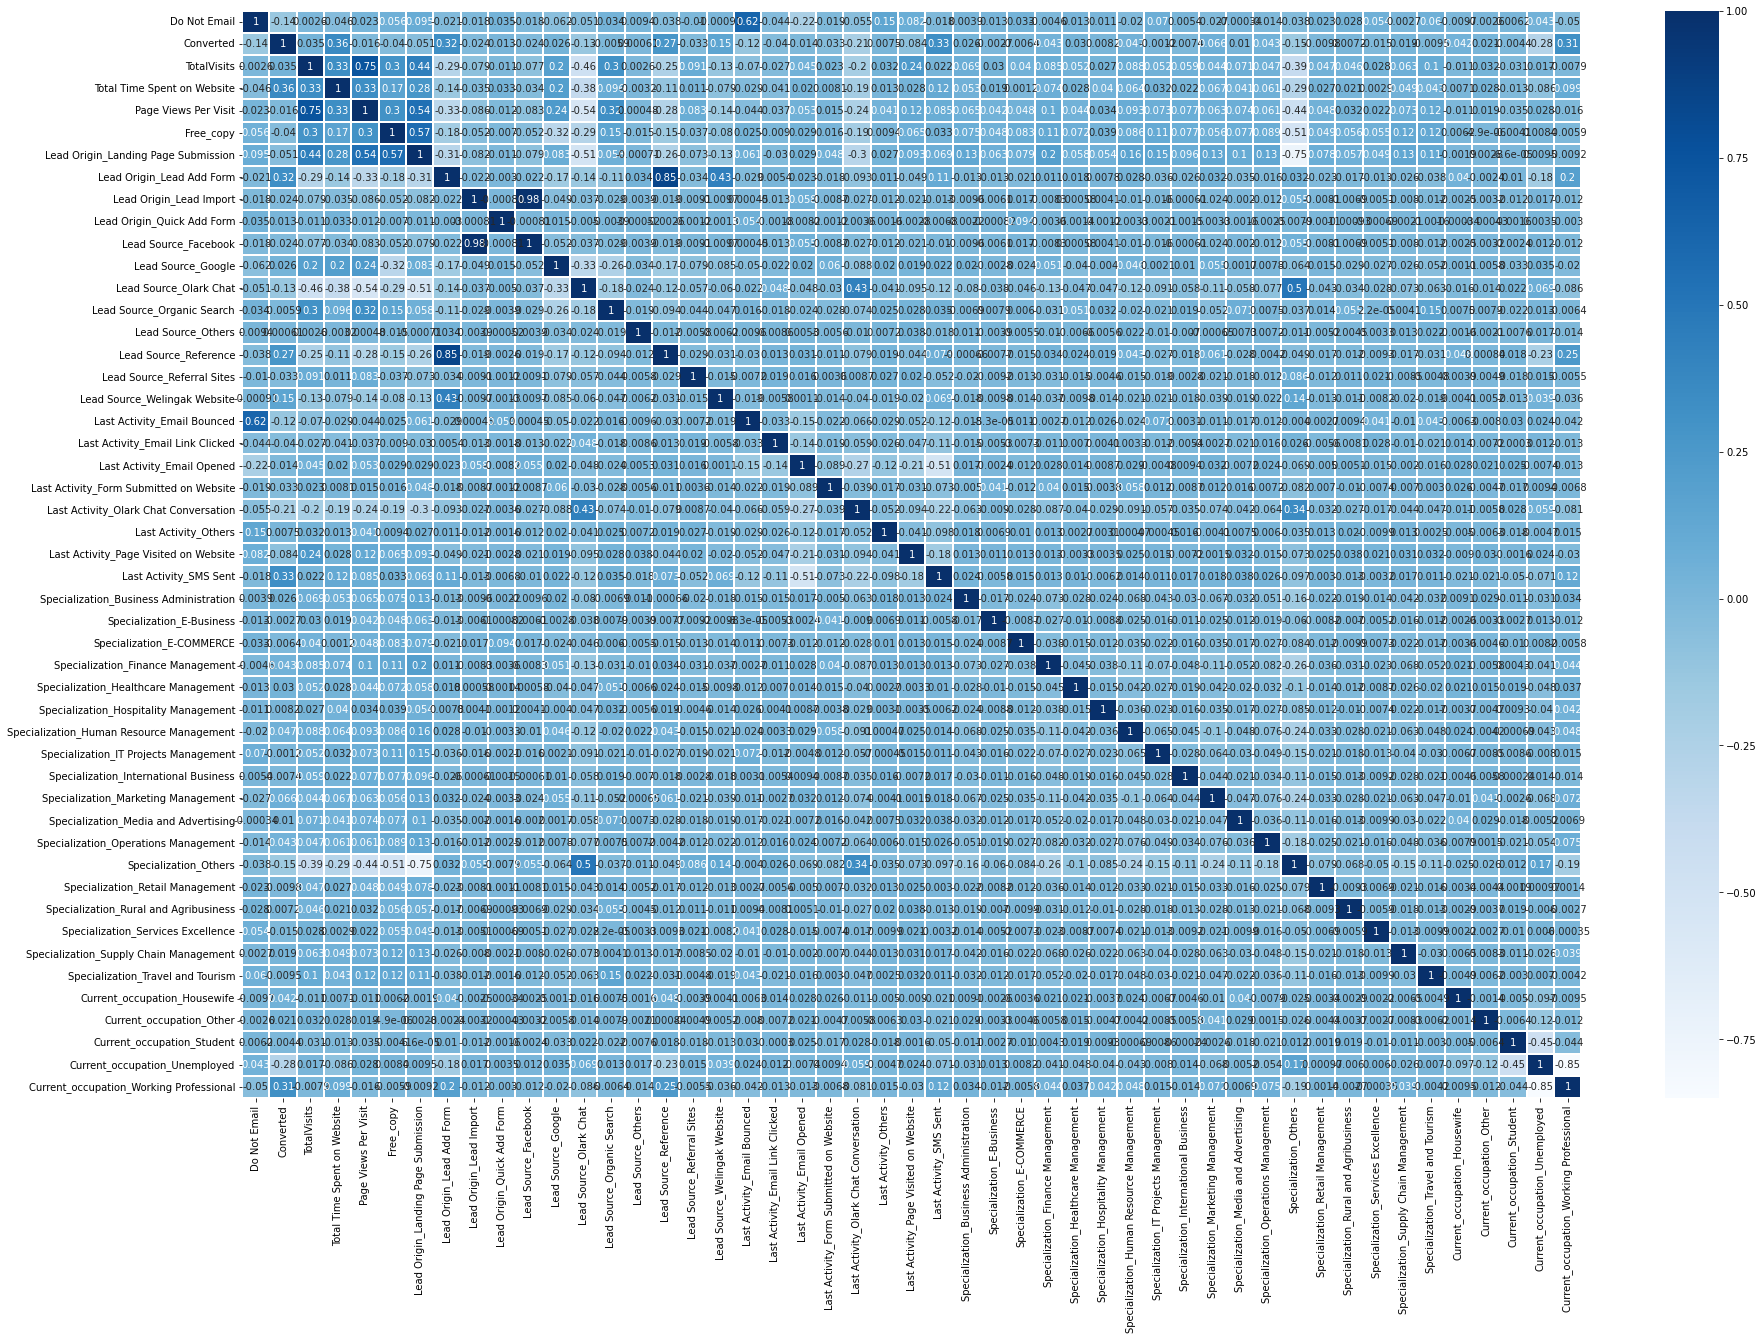

In [93]:
# ploting heatmap for correlation matrix visualisation
plt.figure(figsize=(30,20))
sns.heatmap(leads_df.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

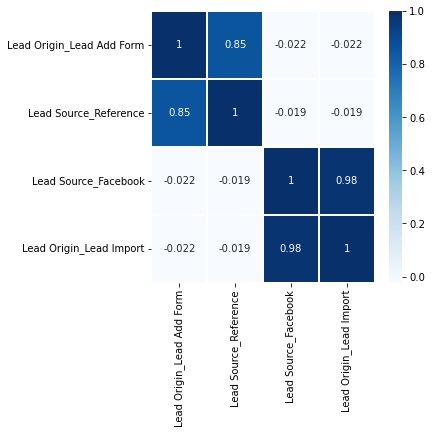

In [94]:
#above show heatmap is having very high number of variable so we are going to create
#another heatmap with probable columns showing high correlation
plt.figure(figsize=(5,5))
sns.heatmap(leads_df[["Lead Origin_Lead Add Form","Lead Source_Reference","Lead Source_Facebook","Lead Origin_Lead Import"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

<strong><span style="color:Blue">Note: Predictor `'Lead Origin_Lead Import'` is highly correlated with `'Lead Source_Facebook'` and `'Lead Origin_Lead Add Form'` is also highly correlated with `'Lead Source_Reference'` with 0.98 and 0.85 as correlation values respectively . Therefore dropping `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'`.</span></strong>

In [95]:
X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

In [96]:
X_train.shape

(6468, 46)

In [97]:
X_test.shape

(2772, 46)

## <strong><span style="color:brown">Step 8: Model Building </span></strong>
- Logistic Regression Model is used for predicting categorical variable
- Feature Selection Using Hybrid technique that is using RFE (Coarse tuning) + Manual fine-tuning using p-values and VIFs

---

### 8.1 Feature Selection Using RFE (Recursive Feature Elimination)
---

In [98]:
# let's use RFE for reducing the number of variables
lgreg = LogisticRegression()
rfe = RFE(lgreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [99]:
# output of RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [100]:
# for incresing the readablity we are using dataframe instead of zip
top15Cols = pd.DataFrame()
top15Cols['features'] = X_train.columns
top15Cols['Feature Chosen'] = rfe.support_
top15Cols['Ranking']=rfe.ranking_
top15Cols.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,Current_occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


In [101]:
# creating the list of columns selected by RFE
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [102]:
# displaying the columns that are not selected 
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
      

In [103]:
# Function for calculating the VIF:-
def getVIF(df):
    X = pd.DataFrame()
    X['Features'] = df.columns
    X['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1
---

In [104]:
# using statsmodel for building detailed model with statistics details

#columns 
col_rfe = X_train.columns[rfe.support_]

#creating dataframe with columns mentioned above
X_train_rfe = X_train[col_rfe]

#adding constant for statsmodel to work as it does not comes built-in with constant
X_train_sm1 = sm.add_constant(X_train_rfe)

# fitting the model
lgsm1 = sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial()).fit()

lgsm1.params

const                                      -1.033284
Total Time Spent on Website                 1.050544
Lead Origin_Landing Page Submission        -1.272090
Lead Source_Facebook                       -0.696059
Lead Source_Olark Chat                      0.900083
Lead Source_Others                          0.980708
Lead Source_Reference                       2.897685
Lead Source_Welingak Website                5.380227
Last Activity_Email Opened                  0.950623
Last Activity_Olark Chat Conversation      -0.553411
Last Activity_Others                        1.258012
Last Activity_SMS Sent                      2.068763
Specialization_Hospitality Management      -1.072037
Specialization_Others                      -1.193681
Current_occupation_Housewife               23.022209
Current_occupation_Working Professional     2.685466
dtype: float64

In [105]:
# analysing the summary of the model
print(lgsm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Mon, 22 May 2023   Deviance:                       5465.5
Time:                        15:23:34   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE : Column named "Current_occupation_Housewife"  will be dropped from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 p-value.</span></strong>

### Model 2
---

In [106]:
col_rfe=col_rfe.drop("Current_occupation_Housewife")

In [107]:
len(col_rfe)

14

In [108]:
# Started with 15 columns and now we have 14 columns(i.e. dropped 1 column "Current_occupation_Housewife")

#creating dataframe with columns mentioned above
X_train_rfe = X_train[col_rfe]

#adding constant for statsmodel to work as it does not comes built-in with constant
X_train_sm2 = sm.add_constant(X_train_rfe)

# fitting the model
lgsm2 = sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial()).fit()

lgsm2.params

const                                     -1.025075
Total Time Spent on Website                1.049364
Lead Origin_Landing Page Submission       -1.267369
Lead Source_Facebook                      -0.696913
Lead Source_Olark Chat                     0.899051
Lead Source_Others                         0.973897
Lead Source_Reference                      2.917123
Lead Source_Welingak Website               5.379144
Last Activity_Email Opened                 0.949036
Last Activity_Olark Chat Conversation     -0.558345
Last Activity_Others                       1.248172
Last Activity_SMS Sent                     2.058828
Specialization_Hospitality Management     -1.079528
Specialization_Others                     -1.197801
Current_occupation_Working Professional    2.677350
dtype: float64

In [109]:
# analysing the summary of the model once again
print(lgsm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Mon, 22 May 2023   Deviance:                       5480.7
Time:                        15:23:35   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE : Column named "Lead Source_Facebook" will be dropped from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 p-value.</span></strong>

### Model 3
---

In [110]:
col_rfe=col_rfe.drop("Lead Source_Facebook")

In [111]:
len(col_rfe)

13

In [112]:
# Started with 15 columns and now we have 13 columns(i.e. dropped 2 column)

#creating dataframe with columns mentioned above
X_train_rfe = X_train[col_rfe]

#adding constant for statsmodel to work as it does not comes built-in with constant
X_train_sm3 = sm.add_constant(X_train_rfe)

# fitting the model
lgsm3 = sm.GLM(y_train,X_train_sm3,family=sm.families.Binomial()).fit()

lgsm3.params

const                                     -1.040542
Total Time Spent on Website                1.051824
Lead Origin_Landing Page Submission       -1.249311
Lead Source_Olark Chat                     0.916940
Lead Source_Others                         0.981395
Lead Source_Reference                      2.937179
Lead Source_Welingak Website               5.396676
Last Activity_Email Opened                 0.943420
Last Activity_Olark Chat Conversation     -0.558250
Last Activity_Others                       1.248700
Last Activity_SMS Sent                     2.055550
Specialization_Hospitality Management     -1.090368
Specialization_Others                     -1.194330
Current_occupation_Working Professional    2.675678
dtype: float64

In [113]:
# analysing the summary of the model once again
print(lgsm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Mon, 22 May 2023   Deviance:                       5482.6
Time:                        15:23:35   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [114]:
# Now checking VIFs for all variables in the Model 3 
getVIF(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.46
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,Current_occupation_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


<strong><span style="color:Blue">NOTE : Column named "Lead Source_Others" will be dropped from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 p-value.</span></strong>

### Model 4
---

In [115]:
col_rfe=col_rfe.drop("Lead Source_Others")

In [116]:
len(col_rfe)

12

In [117]:
# Started with 15 columns and now we have 12 columns(i.e. dropped 3 column)

#creating dataframe with columns mentioned above
X_train_rfe = X_train[col_rfe]

#adding constant for statsmodel to work as it does not comes built-in with constant
X_train_sm4 = sm.add_constant(X_train_rfe)

# fitting the model
lgsm4 = sm.GLM(y_train,X_train_sm4,family=sm.families.Binomial()).fit()

lgsm4.params

const                                     -1.023594
Total Time Spent on Website                1.049789
Lead Origin_Landing Page Submission       -1.258954
Lead Source_Olark Chat                     0.907184
Lead Source_Reference                      2.925326
Lead Source_Welingak Website               5.388662
Last Activity_Email Opened                 0.942099
Last Activity_Olark Chat Conversation     -0.555605
Last Activity_Others                       1.253061
Last Activity_SMS Sent                     2.051879
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Current_occupation_Working Professional    2.669665
dtype: float64

In [118]:
# analysing the summary of the model once again
print(lgsm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Mon, 22 May 2023   Deviance:                       5486.1
Time:                        15:23:35   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE:  Model 4 is stable and has significant p-values within the threshold (p-values less than 0.05), so we will use it for further analysis.</span></strong>


- We will check the VIFs for all variables after Model 4 in-order to verify that multicolinearity doesn't exist amount predictores

In [119]:
getVIF(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,Current_occupation_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


<strong><span style="color:Blue">NOTE:</span></strong> Each and every VIFs value is less than 5. So nothing needs to be done.
- p-values for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIFs).
- Model 4 will be used for `Model Evaluation`.

## <strong><span style="color:brown">Step 9: Evaluating Model </span></strong> 
---
- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall
---

In [120]:
# prediction using model 4
y_train_pred = lgsm4.predict(X_train_sm4)

In [121]:
y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [122]:
y_train_pred.shape

(6468,)

In [123]:
#for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [124]:
# creating dataframe to compare the actual y-label and predicted y-label
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


<strong><span style="color:Blue">NOTE: We have to find the optimal cut-off value making the prediction but for the time being we are using 0.5 as cut-off value.</span></strong> 

In [125]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.5 else 0)

In [126]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


### 9.1 Confusion Matrix
---

In [127]:
# confusion matrix
confMatrix = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
print(confMatrix)

[[3588  414]
 [ 846 1620]]


In [128]:
# Confusion matrix we get after taking threshold value as 0.5

# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  

### 9.2 Accuracy
---

In [129]:
# checking the Accuracy of the model
print(metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted']))

0.8051948051948052


### 9.3 Metrics beyond simply accuracy
---
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability
---

In [130]:
TN = confMatrix[0,0] # true negative
FP = confMatrix[0,1] # false positive
FN = confMatrix[1,0] # false negative
TP = confMatrix[1,1] # true positive

In [131]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.656934306569343


In [132]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.896551724137931


In [133]:
# predicting conversion when customer does not have converted (i.e. Calculate false postive rate)
print(FP/ float(TN+FP))

0.10344827586206896


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.7964601769911505


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8092016238159675


### 9.4 Plotting the ROC Curve

---

An ROC curve demonstrates several things:

- It shows any increase in sensitivity will be accompanied by a decrease in specificity. It shows the tradeoff between sensitivity and specificity .
- The closer the curve follows the top-left hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

---

In [136]:
def rocDrawer(actual, probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='Area under ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

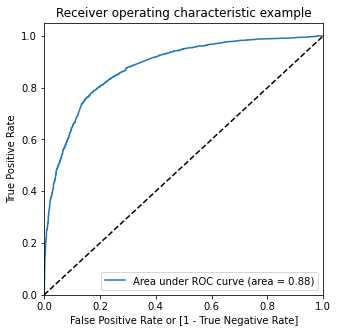

In [138]:
# plotting the graph for ROC curve

rocDrawer(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE: Area under ROC curve is 0.88 out of 1 which indicates a good predictive model</span></strong>

### 9.4.1 Finding Optimal Cutoff Point/ Probability
---
- We have to find the `balanced sensitivity and specificity`

In [139]:
# Let's create columns with different probability cutoffs 
nums = [float(j)/10 for j in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [140]:
# Calculating accuracy, sensitivity and specificity for various cut-off values
cuttOff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    cfmtx = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total=sum(sum(cfmtx))
    accuracy = (cfmtx[0,0]+cfmtx[1,1])/total
    
    speci = cfmtx[0,0]/(cfmtx[0,0]+cfmtx[0,1])
    sensi = cfmtx[1,1]/(cfmtx[1,0]+cfmtx[1,1])
    cuttOff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cuttOff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


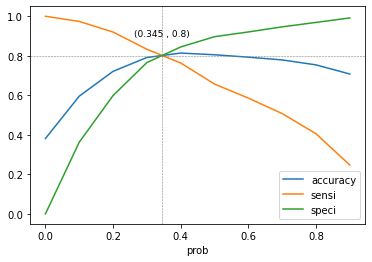

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensitivity_interpcept = interp1d(cuttOff_df['prob'], cuttOff_df['sensi'], kind='linear')#interpolation function

accuracy_interpcept = interp1d(cuttOff_df['prob'], cuttOff_df['accuracy'], kind='linear')#interpolation function

intersection_1 = np.round(float(fsolve(lambda x : sensitivity_interpcept(x) - accuracy_interpcept(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
specificity_interpcept = interp1d(cuttOff_df['prob'], cuttOff_df['speci'], kind='linear')#interpolation function

intersection_2 = np.round(float(fsolve(lambda x : specificity_interpcept(x) - accuracy_interpcept(x), 0.5)), 3)


# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(accuracy_interpcept(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensitivity_interpcept(intersection_x)), 2)
specificity_at_intersection = np.round(float(specificity_interpcept(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cuttOff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


<strong><span style="color:Blue">NOTE: After above graph we get to know that the point approx 0.345 is the optimal cut-off value</span></strong> 

---

In [142]:
# mapping the prediction that is done using optimal cut-off
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis=1,inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


### 9.5 Calculating all metrics using confusion matrix for Train
---

In [143]:
# finding the confusion matrix after new prediction
print(metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['final_predicted']))

0.8045763760049475


In [144]:
# function to calculate the all the metrics using confusion matrix
def logisticRegressionMetrics(confusionMatrix):
    TN = confusionMatrix[0,0]
    FP = confusionMatrix[0,1]
    FN = confusionMatrix[1,0]
    TP = confusionMatrix[1,1]
    
    #all metrics calculation step
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensiti = TP/(TP+FN)
    specifi = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print('True Negative (TN)= ', TN)
    print('True Positive (TP)= ', TP)
    print('False Negative (FN)= ', FN)
    print('False Positve (FP)= ', FP)
    print('Accuracy = ',round(accuracy,4))
    print('Sensitivity = ',round(sensiti,4))
    print('Specificity = ',round(specifi,4))
    print('Precision = ',round(precision,4))
    print('Recall = ',round(recall,4))
    print('False Positive Rate (FPR) = ',round(FPR,4))
    print('True Positive Rate (TPR) = ',round(TPR,4))

In [145]:
# finding the confusion matrix on dataframe y_train_pred_final

confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['final_predicted'])
print('---'*30)

# confusion matrix
print('\n')
print('Confusion Matrix : ')
print(confusion_matrix)
print('\n')
print('---'*30)

print('\n')
logisticRegressionMetrics(confusion_matrix)

print("\n")
print("---"*30,"\n")

------------------------------------------------------------------------------------------


Confusion Matrix : 
[[3230  772]
 [ 492 1974]]


------------------------------------------------------------------------------------------


True Negative (TN)=  3230
True Positive (TP)=  1974
False Negative (FN)=  492
False Positve (FP)=  772
Accuracy =  0.8046
Sensitivity =  0.8005
Specificity =  0.8071
Precision =  0.7189
Recall =  0.8005
False Positive Rate (FPR) =  0.1929
True Positive Rate (TPR) =  0.8005


------------------------------------------------------------------------------------------ 



### 9.6 Precision v/s Recall Tradeoff
- Comparing Precision-Recall view with Specificity-Sensivity view for getting the better threshold value.
---

In [146]:
# Creating precision-recall tradeoff curve from dataframe 
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

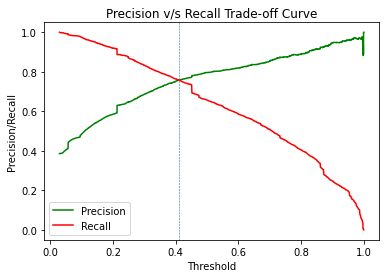

In [147]:
# ploting  precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.title('Precision v/s Recall Trade-off Curve')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

<strong><span style="color:Blue">NOTE: From the above plot we get to know that Precision v/s Recall curve achieves balance at intersection that is the location were find optimal threshold value which in this case is 0.41 approx.</span></strong> 

In [148]:
# creating copy of the dataframe 
y_train_precision_recall = y_train_pred_final.copy()

In [149]:
# prediction after assigning threshold as 0.41 from Precision Recall curve
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map(lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.474082,1871,1,1
1,0,0.073252,6795,0,0
2,0,0.249087,3516,0,0
3,0,0.768973,8105,1,1
4,0,0.212973,3934,0,0


In [150]:
# finding the confusion matrix on dataframe y_train_pred_final

confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'],y_train_precision_recall['precision_recall_prediction'])
print('---'*30)

# confusion matrix
print('\n')
print('Confusion Matrix : ')
print(confusion_matrix)
print('\n')
print('---'*30)

print('\n')
logisticRegressionMetrics(confusion_matrix)

print("\n")
print("---"*30,"\n")

------------------------------------------------------------------------------------------


Confusion Matrix : 
[[3406  596]
 [ 596 1870]]


------------------------------------------------------------------------------------------


True Negative (TN)=  3406
True Positive (TP)=  1870
False Negative (FN)=  596
False Positve (FP)=  596
Accuracy =  0.8157
Sensitivity =  0.7583
Specificity =  0.8511
Precision =  0.7583
Recall =  0.7583
False Positive Rate (FPR) =  0.1489
True Positive Rate (TPR) =  0.7583


------------------------------------------------------------------------------------------ 



<strong><span style="color:Blue">NOTE: 
- According to Business Requirement we want metrices close to 80% and if we compare metrices obtained from both Precision-Recall and sensitivity-specificity the values of those metrices drops around 75% in case of Precision-Recall view.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.
</span></strong>
---

### <strong><span style="color:purple"> Adding `Lead Score` Feature to Training dataframe </span></strong> 
- A higher the score greater is the chance to get converted (i.e HOT)  i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and lesser is the chance to get converted.
---

In [151]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.474082,1871,1,47
1,0,0.073252,6795,0,7
2,0,0.249087,3516,0,25
3,0,0.768973,8105,1,77
4,0,0.212973,3934,0,21


## <strong><span style="color:brown">Step 10: Making Predictions on test set </span></strong> 
---

### 10.1 Scaling Test dataset
---

In [152]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [153]:
col_rfe

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_occupation_Working Professional'],
      dtype='object')

In [154]:
len(col_rfe)

12

In [155]:
# Fetching numerical columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[col_rfe]# Only creating the test dataframe from columns which is used in Model 4
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


### 10.2 Predicting values on test set using final Model
---

In [156]:
#addign constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [157]:
# making prediction final model i.e. lgsm4
y_test_pred = lgsm4.predict(X_test_sm)

In [158]:
# top 10 prediction columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [159]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.697934
2376,0.860665
7766,0.889241
9199,0.057065
4359,0.871510


In [160]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [161]:
# introducting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_df.reset_index(drop=True, inplace=True)
y_test_pred.reset_index(drop=True, inplace=True)


# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [162]:
#renaming the columns
y_pred_final = y_pred_final.rename(columns={0:'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [163]:
# taking sensitivity-specificity method at 0.345 probability cutoff/threshold during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


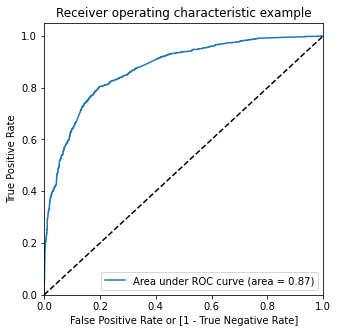

In [164]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

rocDrawer(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE: Area under ROC curve is 0.8 out of 1 which indicates a good predictive model </span></strong>

<strong><span style="color:Blue">NOTE:
- As final prediction is made we are only left with evaluation. 
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.</span></strong> 

### 10.3 Test set Model Evaluation
- Calculating all metrics using confusion matrix for Test set
---

In [165]:
# finding the confusion matrix on dataframe y_train_pred_final

confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final['final_predicted'])
print('---'*30)

# confusion matrix
print('\n')
print('Confusion Matrix : ')
print(confusion_matrix)
print('\n')
print('---'*30)

print('\n')
logisticRegressionMetrics(confusion_matrix)

print("\n")
print("---"*30,"\n")

------------------------------------------------------------------------------------------


Confusion Matrix : 
[[1353  324]
 [ 221  874]]


------------------------------------------------------------------------------------------


True Negative (TN)=  1353
True Positive (TP)=  874
False Negative (FN)=  221
False Positve (FP)=  324
Accuracy =  0.8034
Sensitivity =  0.7982
Specificity =  0.8068
Precision =  0.7295
Recall =  0.7982
False Positive Rate (FPR) =  0.1932
True Positive Rate (TPR) =  0.7982


------------------------------------------------------------------------------------------ 



<strong><span style="color:Blue">NOTE: The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- `For Test set`
    - Accuracy : 80.34%
    - Sensitivity : 79.82% ≈ 80%(approx)
    - Specificity : 80.68%
    
    Since the matrics obtained from test set is very close to train set, that simply means our model lgsm4 is performing consistantly.</span></strong> 

In [166]:
# printing the parameters/coefficient from final model
parameters = lgsm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.388662
Lead Source_Reference                      2.925326
Current_occupation_Working Professional    2.669665
Last Activity_SMS Sent                     2.051879
Last Activity_Others                       1.253061
Total Time Spent on Website                1.049789
Last Activity_Email Opened                 0.942099
Lead Source_Olark Chat                     0.907184
Last Activity_Olark Chat Conversation     -0.555605
const                                     -1.023594
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Lead Origin_Landing Page Submission       -1.258954
dtype: float64

<strong><span style="color:Blue">NOTE: Bigger the coefficient higher is influence of that variable in prediction.</span></strong>

## <strong><span style="color:purple"> Adding `Lead Score` Feature to Test dataframe </span></strong> 
- A higher the score greater is the chance to get converted (i.e HOT)  i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and lesser is the chance to get converted.
---

In [167]:
# adding Lead score in dataframe
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87


<strong><span style="color:purple">Lead Score: Lead Score is assigned to the respective customer.
- The customers with a higher lead score have a higher conversion chance while
- The customers with a lower lead score have a lower conversion chance.</span></strong> 

# <strong><span style="color:brown">Conclusion:- </span></strong> 

## Result of Training - Testing
### <strong><span style="color:purple">Metrics on Train Data Set:-</span></strong>            

- <strong><span style="color:Green">Accuracy:</span></strong> 80.46%

- <strong><span style="color:Green">Sensitivity:</span></strong> 80.05%

- <strong><span style="color:Green">Specificity:</span></strong> 80.71%

### <strong><span style="color:purple">Metrics on Test Data Set:-</span></strong> 

- <strong><span style="color:Green">Accuracy:</span></strong> 80.34%

- <strong><span style="color:Green">Sensitivity:</span></strong> 79.82% ≈ 80%

- <strong><span style="color:Green">Specificity:</span></strong> 80.68%
 

<strong><span style="color:Blue">NOTE:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- `The CEO of X Education had set a target sensitivity of around 80%.`
- Using the cut-off value of 0.345 we have achieved `sensitivity of 80.05%` on training while 79.82% which is 80% approx. in the test data set.
- Sensitivity indicates in our case that how many leads the model identifies correctly out-off all the prospect leads which are converting.
- The model also achieved an accuracy of 80.34%, which is in line with the study's objectives.

---



## Inference on Model parameters:-
- The final Logistic Regression Model has 12 features

### <strong><span style="color:purple">`Top 3 features` that contributing `positively` to predicting hot leads in the model are:</span></strong> 
- <strong><span style="color:Green">Lead Source_Welingak Website</span></strong>

- <strong><span style="color:Green">Lead Source_Reference</span></strong> 

- <strong><span style="color:Green">Current_occupation_Working Professional</span></strong> 

<strong><span style="color:Blue">NOTE: </span></strong> The Optimal threshold/cutoff probability point is 0.345.Converted probability predicted having value greater than 0.345 will be predicted as Converted lead (Hot lead) while those smaller than 0.345 will be predicted as not Converted lead (Cold lead).

---

# <strong><span style="color:brown">Analysis Based Recommendations:- </span></strong> 

### <strong><span style="color:purple">In-Order to increase our Lead Conversion Rates:- </span></strong>  

- we have to focus on the features having positive as well as high coefficients for target our marketing stratigies.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- We can spend more budget on Welingak Website as it is the top performer, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- we can target working professionals as they have high conversion rate as well as they are ready to pay as they have better financial situation to pay higher fees too. 


### <strong><span style="color:purple">In-Order to identify areas of improvement:- </span></strong>  

- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.



